<h1 style="text-align: center;"><center>Master&nbsp;in&nbsp;Interdisciplinary&nbsp;and&nbsp;Innovation&nbsp;Engineering Computer&nbsp;Vision</center></h1>
<h2 style="text-align: center;"><center><strong>Neural Networks - Practice 1</strong></center></h2>
<hr />
<p style="text-align: center;"><center><br />Departament de Matem&agrave;tiques (DMAT)<br />Escola d&rsquo;Enginyeria de Barcelona Est (EEBE)<br />Universitat Polit&egrave;cnica de Catalunya (UPC)<br />2023</center></p>
<ul>
<li>Perceptron</li>
<li>Adaptive Linear Neuron (Adaline)</li>
<li>Gradient descent</li>
</ul>



---
<h1>Practice 1</h1>
<p>A flower and ornamental company wants to automate the classification of the Iris plant. There are 3 species of iris: Iris <strong>setosa</strong>, Iris <strong>virginica</strong> and Iris <strong>versicolor</strong>. The company collected 50 samples of each species. In each sample, 4 characteristics were measured:</p>
<ul>
<li>sepal length</li>
<li>sepal width</li>
<li>petal length</li>
<li>petal width</li>
</ul>

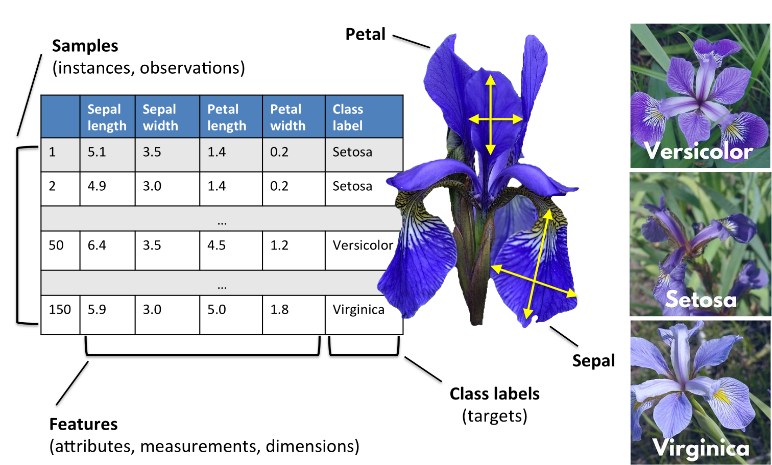


<p>They are interested in classifying the species <font color=#ff0000><strong>Iris setosa</strong></font> and <strong><font color=#ff0000>Iris versicolor</font></strong>. Use a <strong>perceptron</strong> to perform automatic classification.</p>


---



## 1. Iris dataset
We will use the iris dataset to train our perceptron.



*   **Pandas library** is specialized in the management and analysis of **datasets**. We will use this library to create the training set.






In [22]:
import pandas as pd   # load the pandas library, "pd" to simplify the name of the library

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'    # variable where we store iris dataset url

df = pd.read_csv(url, header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'labels'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: labels, dtype: int64

We will extract the first 100 class labels that correspond to the 50 iris-setosa and 50 iris-versicolor flowers and convert the class labels into the two integer class labels, 1 (versicolor) and -1 (setosa) that we assign to a vector 'y':

* **Matplotlib** library is used to **create** static, animated, and interactive **visualizations** in Python.
* **Numpy** library is used for **scientific computing** with Python

In [20]:
import numpy as np    #load numpy library, "np" to simplify the name

# select Iris-setosa and Iris-versicolor
y = df.loc[0:100,'labels'].values

# Replace "Iris-versicolor" and "Iris-setosa" labels with the 1 and -1 labels 
# that the perceptron uses for binary classification.
y = np.where(y == 'Iris-setosa', 1,-1)

# Extract sepal and petal length
X = df.loc[0:100,['sepal_length','petal_length']].values

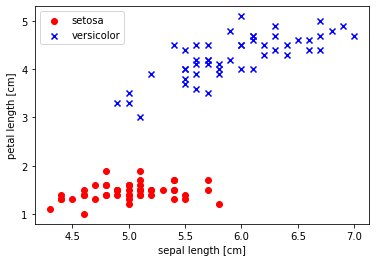

In [21]:
import matplotlib.pyplot as plt   #load matplotlib library, "plt" to simplify the name

#plot data
plt.scatter(X[:50,0], X[:50,1],
           color='red',
           marker='o',
           label='setosa')

plt.scatter(X[50:100,0], X[50:100,1],
           color='blue',
           marker='x',
           label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Application for binary classification

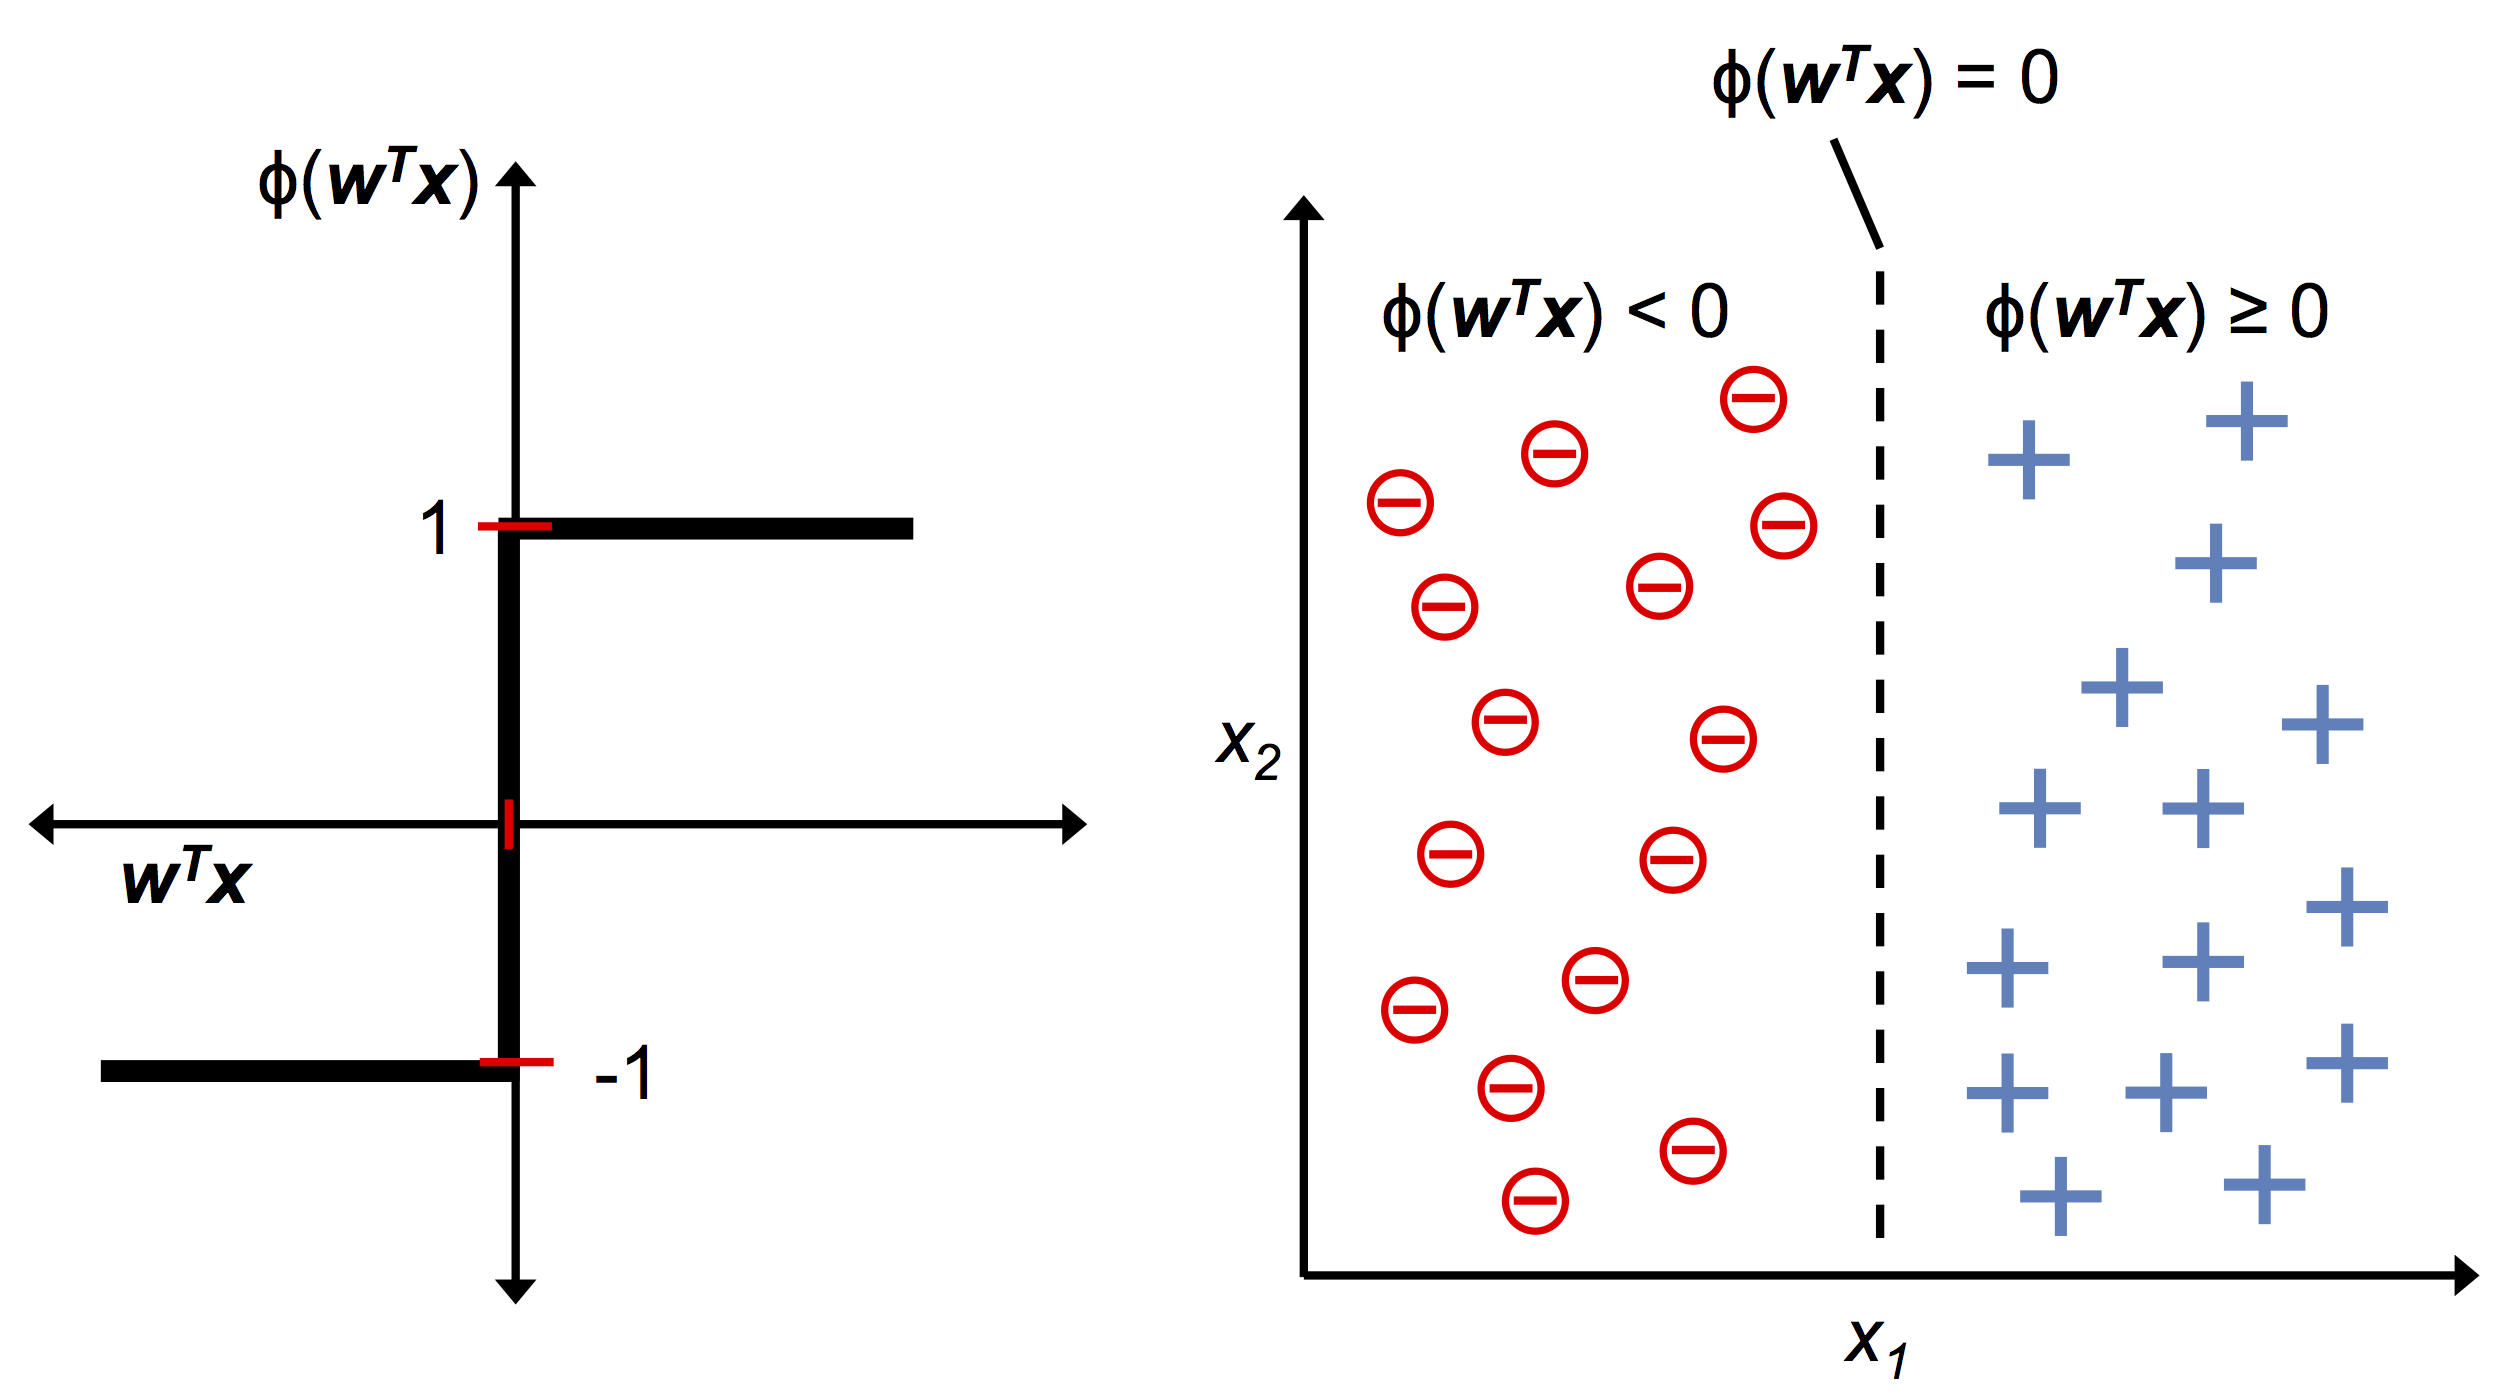

## 2. Let's define and initialize some parameters

In [38]:
from matplotlib._api.deprecation import warn_deprecated
from matplotlib._api import warn_external

lr = 0.01

n_iter = 10

random_state = 1 #random seed for random weight initialization.
rgen = np.random.RandomState(random_state)

# Initialize the weights in vector 'w_' of size 3: dimensions in the dataset (features) + 1
w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
errors_ = [] # List to store missclassifications in each epoch

Notice that the vector **w_** contains small random numbers drawn from a normal distribution with **standard deviation = 0.01** using command **rgen.normal**, where rgen is a NumPy random number generator that we seeded with a user-specified random seed so that we can reproduce previous results.

IMPORTANT: **We dont initialize weights to zero** because the learning rate 'lr' only has an effect on the classification outcome if the weights are initialized to non-zero values, If all the weigths are initialized to zero, the learning rate parameter eta, affects only the scale of the weigth vector , not the direction. For example: Consider two vectors v1 and 'v2=0.5*v1'

```
v1 = np.array([1,2,3])
v2 = 0.5*v1
theta = np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
print(theta)
# 0.0

v3 = np.array([4,5,6])
theta2 = np.arccos(v1.dot(v3) / (np.linalg.norm(v1) * np.linalg.norm(v3)))
print(theta2)
# 0.2257261285527342
```

## 3. Development and train of the perceptron

For training, we loop over all individual examples in the training set and update the weights according to the perceptron learning rule.

Inmediately we make a prediction and update the weights. 

We also collect the missclassifications during each epoch in errors list so that we can later analyze how well our perceptron performed during the training. 



* X: array of shape = [n_examples, n_features]. Training vectors where n_examples is the number of examples and n_features is the number of features.

* y: array of shape = [n_examples].
   Target values (true values)

In [39]:
for i in range(n_iter):
  errors = 0

  for xi, target in zip(X, y):
    # perceptron
    # z = w*x
    perceptron = np.dot(xi,w_[1:]) +w_[0] # np.dot() computes the dot product of two input matrices.

    # prediction
    prediction = np.where(perceptron >= 0.0, 1, -1)

    # update
    update = lr * (target - prediction)
    w_[1:] += update * xi
    w_[0] += update
    errors += int(update != 0.0)

  errors_.append(errors)

<function matplotlib.pyplot.show(close=None, block=None)>

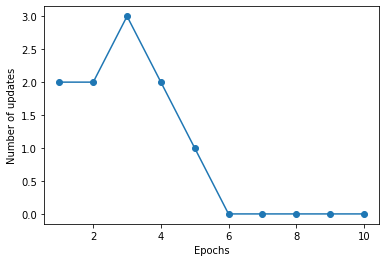

In [40]:
plt.plot(range(1, len(errors_) + 1), errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show

The perceptron converged after the sixth epoch and should now be able to classify the training examples perfectly.
Now we define a function to visualize the decision boundaries for two dimensional datasets.

## 4. Visualization of decision limits for two-dimensional data sets
Now we setup marker generator and color map. we define a number of 'colors' and 'markers' and create a colormap from the list of colors using 'ListedColormap':

In [41]:
from matplotlib.colors import ListedColormap

resolution = 0.02
markers = ('s', 'x', 'o', 'ˆ', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

Now we determine the minimun and maximum values for the two features and use those feature vectors to create
a pair of grid arrays, xx1 and xx2, via the NumPy 'meshgrid' function. Since we trained our perceptron classifier
on two feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of 
columns as the Iris training subset so that we can predict the class labels 'z' of the corresponding grid points:

In [42]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
input_ = np.array([xx1.ravel(),xx2.ravel()]).T
#perceptron
perceptron = np.dot(input_, w_[1:]) + w_[0]
#prediction
Z = np.where(perceptron >= 0.0, 1, -1)
Z = Z.reshape(xx1.shape)

After reshaping the predicted class labels 'z' into a grid with the same dimensions as 'xx1' nd 'xx2' we can now
draw a contour plot via Matplotlib's 'contourf' function, which maps the different decision regions to 
different colors for each predicted class in the grid array:

<ipython-input-43-8cd0c9b8b7db>:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],


<function matplotlib.pyplot.show(close=None, block=None)>

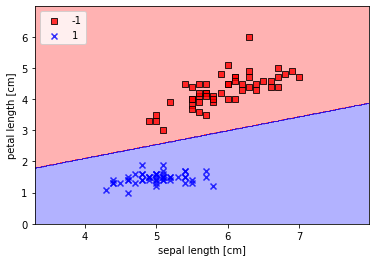

In [43]:
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

#plot class examples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = cl,
                edgecolor = 'black')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show

The perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if the classes cannot be separated perfectly by such a linear decision boundary, the weigths will never stop updating unless we set a maximum number of epochs.

## 5. Development of the perceptron in a **class** function

In [55]:
class full_perceptron:

    # function to input iterations and learning rate
    def __init__(self, lr=0.01, n_iter=10): 
        self.lr = lr
        self.n_iter = n_iter

    # function to train 
    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) # we do not take zeros because its product is 0
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.prediction(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # function perceptron
    def perceptron(self, X):
        #perceptron
        perceptron = np.dot(X, self.w_[1:]) + self.w_[0]
        return perceptron

    # function prediction
    def prediction(self, X):
        return np.where(self.perceptron(X) >= 0.0, 1, -1)
    
    # function accuracy
    def accuracy(self, X_test, y_test):
            y_pred = [self.prediction(x) for x in X_test]
            # Accuracy = (Number of correct predictions) / (Total number of predictions)
            accuracy = np.sum(y_pred == y_test) / len(y_test)
            return accuracy

## 5.1. Perceptron 1

In [116]:
# define perceptron 1
perceptron_1 = full_perceptron(lr = 0.01, n_iter = 10)

# Perceptron 1 training
perceptron_1.train(X, y)

In [91]:
# Predict the class of a flower with a sepal length of 5.5 and a petal width of 1.5
X_test = [5.5, 1.5]
y_pred = perceptron_1.prediction(X_test)
print('Prediction:', y_pred)

if y_pred == -1:
    print("The flower is Iris-setosa")
else:
    print("The flower is Iris-versicolor")

Prediction: 1
The flower is Iris-versicolor


In [95]:
# hacer predicciones en el conjunto de datos de entrenamiento
y_pred = []
for xi in X:
    y_pred.append(perceptron_1.prediction(xi))
print('Predictions:', y_pred)
print('Reak labels:', y)

Predictions: [array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), array(-1), ar

## 5.2. Perceptron 2

## Split the dataset into training and testing

Split a DataFrame into training (train) and test (test) sets is a common practice in machine learning to evaluate the performance of a predictive model.

* The train set is used to train and fit the model
* The test set is used to assess its ability to generalize and make accurate predictions on new and unseen data.

The idea behind this split is that the model should be trained on one part of the data set (training set) and then tested on a different part of the data set (test set) to measure its ability to generalize and predict with precision on new data.

It is important to note that the division into training and test sets should be done randomly to ensure that the test data is representative of the training data and to avoid bias in model evaluation.


* train_test_split is used to split arrays or matrices into random train and test subsets.

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1) # 70% train, 30% test


In [118]:
# define perceptron 2
perceptron_2 = full_perceptron(lr = 0.1, n_iter = 100)
perceptron_2.train(X, y)
accuracy = perceptron_2.accuracy(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
